In [3]:
import pandas as pd 
import sys
import os
sys.path.append(os.path.abspath(r'C:\Users\Yibabe\Desktop\kifiyaAIMweek-2\scripts'))
from load_data import load_data_from_postgres

In [4]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")

C:\Users\Yibabe\Desktop\kifiyaAIMweek-2\scripts\load_data.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [5]:
# Assuming 'data' is your DataFrame
print(df.columns.tolist())

['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (

In [36]:
#select the most necessary columns from the given data 
# List of columns to keep
columns_to_keep = [
    'Dur. (ms)', 'Start', 'End', 'IMSI', 'MSISDN/Number','Bearer Id',
    'Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
    'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Total DL (Bytes)', 'Total UL (Bytes)','Social Media UL (Bytes)',
    'Social Media DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)','Handset Type','Handset Manufacturer'
]

# Drop columns not in the list of columns to keep
data_cleaned = df[columns_to_keep]

# Drop rows with missing values in relevant columns
#df_cleaned = df.dropna(subset=['Bearer Id', 'Dur. (ms)', 'IMSI', 'Total DL (Bytes)', 'Total UL (Bytes)'])


In [9]:
data_cleaned.head()

,Dur. (ms),Start,End,IMSI,MSISDN/Number,Bearer Id,Avg RTT DL (ms),Avg Bearer TP DL (kbps),TCP DL Retrans. Vol (Bytes),HTTP DL (Bytes),HTTP UL (Bytes),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Handset Type,Handset Manufacturer
0,1823652.0,4/4/2019 12:01,4/25/2019 14:35,2.082014e+14,3.366496e+10,1.311448e+19,42.0,23.0,NaN,NaN,NaN,308879636.0,36749741.0,1545765.0,15854611.0,8198936.0,Samsung Galaxy A5 Sm-A520F,Samsung
1,1365104.0,4/9/2019 13:04,4/25/2019 8:15,2.082019e+14,3.368185e+10,1.311448e+19,65.0,16.0,NaN,NaN,NaN,653384965.0,53800391.0,1926113.0,20247395.0,18338413.0,Samsung Galaxy J5 (Sm-J530),Samsung
2,1361762.0,4/9/2019 17:42,4/25/2019 11:58,2.082003e+14,3.376063e+10,1.311448e+19,NaN,6.0,NaN,NaN,NaN,279807335.0,27883638.0,1684053.0,19725661.0,17587794.0,Samsung Galaxy A8 (2018),Samsung
3,1321509.0,4/10/2019 0:31,4/25/2019 7:36,2.082014e+14,3.375034e+10,1.311448e+19,NaN,44.0,NaN,NaN,NaN,846028530.0,43324218.0,644121.0,21388122.0,13994646.0,undefined,undefined
4,1089009.0,4/12/2019 20:10,4/25/2019 10:40,2.082014e+14,3.369980e+10,1.311448e+19,NaN,6.0,NaN,NaN,NaN,569138589.0,38542814.0,862600.0,15259380.0,17124581.0,Samsung Sm-G390F,Samsung


In [10]:
data_cleaned.shape  

(150001, 18)

<Axes: >

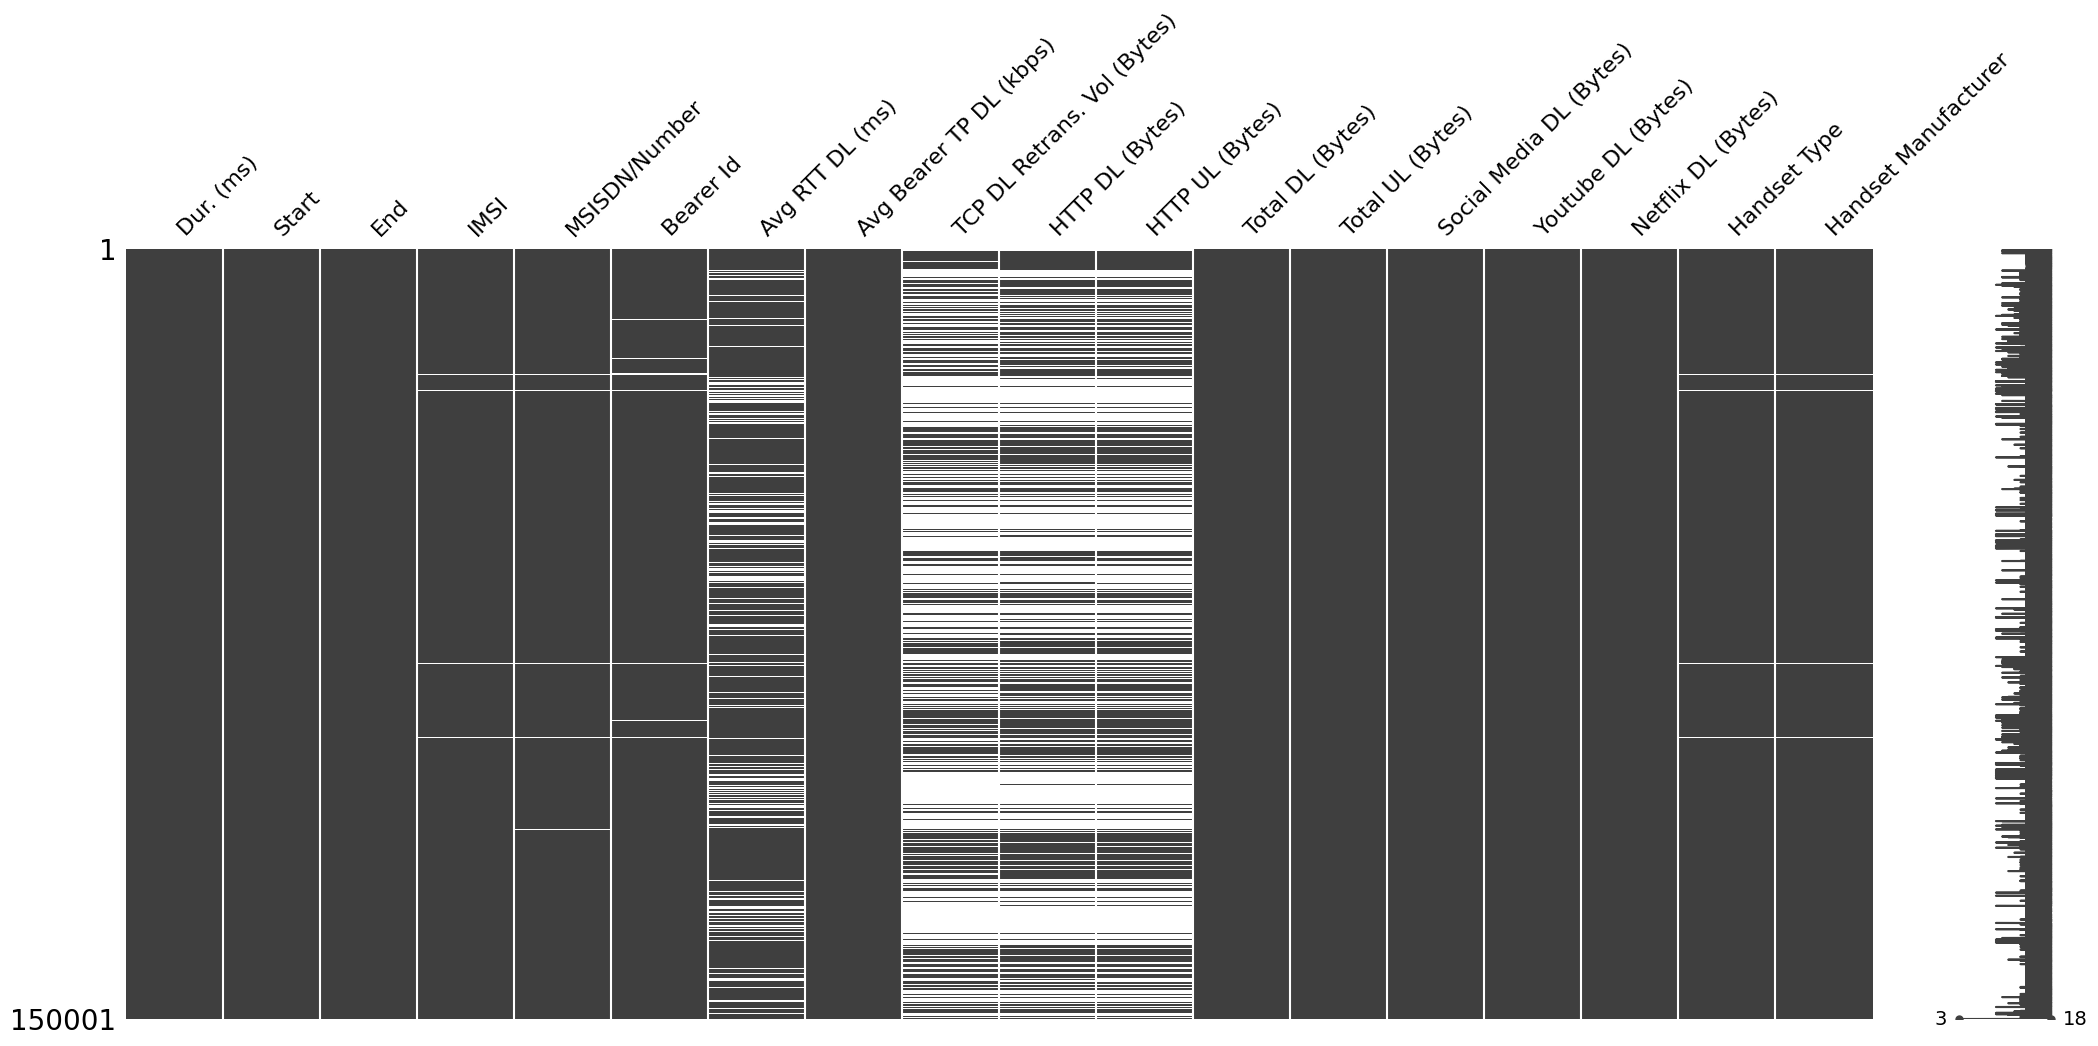

In [11]:
import missingno as msno
msno.matrix(data_cleaned)

In [12]:
# Fill 'HTTP UL' and 'HTTP DL' with 0 (assuming missing values indicate no data transfer)
data_cleaned['HTTP UL (Bytes)'].fillna(0, inplace=True)
data_cleaned['HTTP DL (Bytes)'].fillna(0, inplace=True)

# Fill 'TCP DL Retrans. Vol (Bytes)' using linear interpolation (useful if time-dependent)
data_cleaned['TCP DL Retrans. Vol (Bytes)'].interpolate(method='linear', inplace=True)

# Fill 'Avg RTT DL (ms)' with the median or use group-based imputation
data_cleaned['Avg RTT DL (ms)'].fillna(data_cleaned['Avg RTT DL (ms)'].median(), inplace=True)
# Fill IMSI and MSISDN/Number with placeholder values
data_cleaned['IMSI'].fillna('Unknown_IMSI', inplace=True)
data_cleaned['MSISDN/Number'].fillna('Unknown_MSISDN', inplace=True)
# Check the remaining columns
data_cleaned['Handset Type'].dropna()
data_cleaned['Handset Manufacturer'].dropna()
data_cleaned['Bearer Id'].dropna()


C:\Users\Yibabe\AppData\Local\Temp\ipykernel_5628\4109715817.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['HTTP UL (Bytes)'].fillna(0, inplace=True)
C:\Users\Yibabe\AppData\Local\Temp\ipykernel_5628\4109715817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['HTTP UL (Bytes)'].fillna(0, inplace=True)
C:\User

0         1.311448e+19
1         1.311448e+19
2         1.311448e+19
3         1.311448e+19
4         1.311448e+19
              ...     
149995    1.304243e+19
149996    7.277826e+18
149997    7.349883e+18
149998    1.311448e+19
149999    1.311448e+19
Name: Bearer Id, Length: 149010, dtype: float64

In [37]:
df_cleaned =data_cleaned.dropna()
df_cleaned.isnull().sum()

Dur. (ms)                      0
Start                          0
End                            0
IMSI                           0
MSISDN/Number                  0
Bearer Id                      0
Avg RTT DL (ms)                0
Avg Bearer TP DL (kbps)        0
TCP DL Retrans. Vol (Bytes)    0
HTTP DL (Bytes)                0
HTTP UL (Bytes)                0
Total DL (Bytes)               0
Total UL (Bytes)               0
Social Media UL (Bytes)        0
Social Media DL (Bytes)        0
Youtube DL (Bytes)             0
Netflix DL (Bytes)             0
Handset Type                   0
Handset Manufacturer           0
dtype: int64

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [57]:
#Calculate Sessions Frequency

In [58]:
# Group by IMSI to calculate the number of sessions per user
session_freq = df_cleaned.groupby('IMSI')['Bearer Id'].count().reset_index()
session_freq.columns = ['IMSI', 'Session Frequency']


In [16]:
session_freq

,IMSI,Session Frequency
0,2.040471e+14,1
1,2.040808e+14,1
2,2.082001e+14,1
3,2.082001e+14,1
4,2.082001e+14,2
...,...,...
106869,2.082099e+14,1
106870,2.082099e+14,1
106871,2.082099e+14,1
106872,2.082522e+14,1


In [ ]:
# Calculate Session Duration

In [59]:
# Convert session duration from milliseconds to seconds
df_cleaned['Session Duration (s)'] = df_cleaned['Dur. (ms)'] / 1000

# Group by IMSI to calculate total and average session duration
session_duration = df_cleaned.groupby('IMSI')['Session Duration (s)'].agg(['sum', 'mean']).reset_index()
session_duration.columns = ['IMSI', 'Total Duration (s)', 'Avg Duration (s)']


C:\Users\Yibabe\AppData\Local\Temp\ipykernel_5628\3521273289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Session Duration (s)'] = df_cleaned['Dur. (ms)'] / 1000


In [18]:
session_duration

,IMSI,Total Duration (s),Avg Duration (s)
0,2.040471e+14,869.844,869.8440
1,2.040808e+14,877.385,877.3850
2,2.082001e+14,86.019,86.0190
3,2.082001e+14,86.254,86.2540
4,2.082001e+14,573.923,286.9615
...,...,...,...
106869,2.082099e+14,127.367,127.3670
106870,2.082099e+14,168.543,168.5430
106871,2.082099e+14,86.399,86.3990
106872,2.082522e+14,56.613,56.6130


In [ ]:
#Calculate Total Traffic (Download + Upload)

In [60]:
# Calculate total traffic (download + upload)
df_cleaned['Total Traffic (Bytes)'] = df_cleaned['Total DL (Bytes)'] + df_cleaned['Total UL (Bytes)']

# Group by IMSI to calculate total and average traffic per user
traffic_data = df_cleaned.groupby('IMSI')['Total Traffic (Bytes)'].agg(['sum', 'mean']).reset_index()
traffic_data.columns = ['IMSI', 'Total Traffic (Bytes)', 'Avg Traffic (Bytes)']


C:\Users\Yibabe\AppData\Local\Temp\ipykernel_5628\975870561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total Traffic (Bytes)'] = df_cleaned['Total DL (Bytes)'] + df_cleaned['Total UL (Bytes)']


In [20]:
traffic_data

,IMSI,Total Traffic (Bytes),Avg Traffic (Bytes)
0,2.040471e+14,1.391536e+08,139153646.0
1,2.040808e+14,2.321240e+08,232123971.0
2,2.082001e+14,8.517164e+07,85171639.0
3,2.082001e+14,4.265016e+08,426501585.0
4,2.082001e+14,1.033092e+09,516546013.5
...,...,...,...
106869,2.082099e+14,7.227036e+08,722703585.0
106870,2.082099e+14,4.958656e+08,495865571.0
106871,2.082099e+14,3.381806e+08,338180591.0
106872,2.082522e+14,8.457132e+08,845713212.0


In [ ]:
# Merge All Metrics into a Single DataFrame

In [21]:
# Merge the calculated metrics into one DataFrame
user_engagement = session_freq.merge(session_duration, on='IMSI')
user_engagement = user_engagement.merge(traffic_data, on='IMSI')

# Inspect the final user engagement DataFrame
user_engagement.head()


,IMSI,Session Frequency,Total Duration (s),Avg Duration (s),Total Traffic (Bytes),Avg Traffic (Bytes)
0,2.040471e+14,1,869.844,869.8440,1.391536e+08,139153646.0
1,2.040808e+14,1,877.385,877.3850,2.321240e+08,232123971.0
2,2.082001e+14,1,86.019,86.0190,8.517164e+07,85171639.0
3,2.082001e+14,1,86.254,86.2540,4.265016e+08,426501585.0
4,2.082001e+14,2,573.923,286.9615,1.033092e+09,516546013.5


#Visualizing the Results

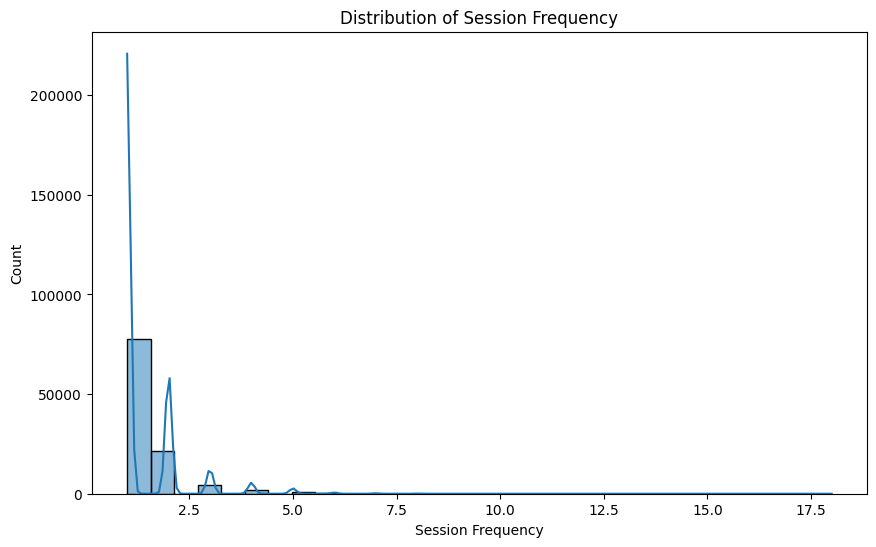

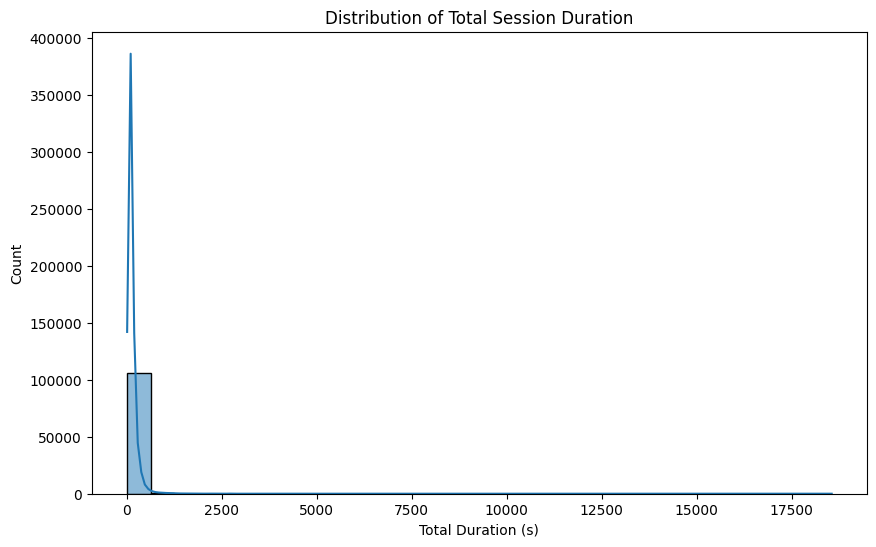

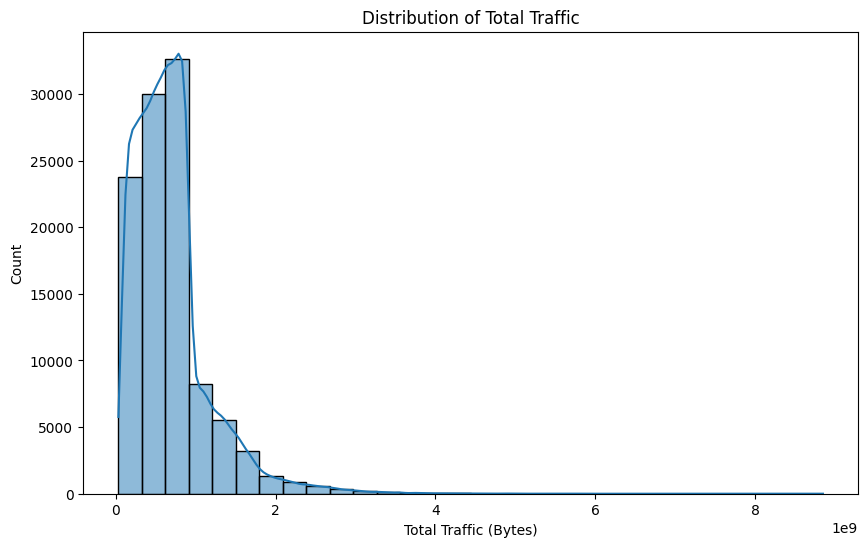

In [22]:
# Plot session frequency distribution
plt.figure(figsize=(10,6))
sns.histplot(user_engagement['Session Frequency'], bins=30, kde=True)
plt.title('Distribution of Session Frequency')
plt.show()

# Plot total session duration distribution
plt.figure(figsize=(10,6))
sns.histplot(user_engagement['Total Duration (s)'], bins=30, kde=True)
plt.title('Distribution of Total Session Duration')
plt.show()

# Plot total traffic distribution
plt.figure(figsize=(10,6))
sns.histplot(user_engagement['Total Traffic (Bytes)'], bins=30, kde=True)
plt.title('Distribution of Total Traffic')
plt.show()


In [ ]:
#analysis of the next task 2.1

In [62]:
# Aggregate metrics per customer (MSISDN)
customer_metrics = df_cleaned.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Sessions frequency
    'Session Duration (s)': 'sum',  # Total session duration
    'Total Traffic (Bytes)': 'sum'  # Total traffic (download + upload)
}).reset_index()

# Rename columns for clarity
customer_metrics.columns = ['MSISDN/Number','Session Frequency', 'Total Duration (s)', 'Total Traffic (Bytes)']

# Report the top 10 customers for each engagement metric
top_10_frequency = customer_metrics.nlargest(10, 'Session Frequency')
top_10_duration = customer_metrics.nlargest(10, 'Total Duration (s)')
top_10_traffic = customer_metrics.nlargest(10, 'Total Traffic (Bytes)')


In [63]:
# Display the top 10 customers for each metric
print("Top 10 Customers by Session Frequency:")
top_10_frequency

Top 10 Customers by Session Frequency:


,MSISDN/Number,Session Frequency,Total Duration (s),Total Traffic (Bytes)
15492,3.365973e+10,12,3204.984,5.590099e+09
28706,3.366716e+10,12,8485.596,5.499476e+09
2359,3.361489e+10,11,6049.275,6.348299e+09
14620,3.365936e+10,10,2332.674,4.224487e+09
15717,3.365982e+10,10,4889.926,3.299376e+09
268,3.360313e+10,9,4887.843,3.737505e+09
11912,3.365826e+10,9,2484.765,4.927907e+09
33649,3.367588e+10,9,2792.787,4.602815e+09
34756,3.368156e+10,9,4093.416,3.791379e+09
468,3.360452e+10,8,3425.929,4.139835e+09


In [64]:
print("Top 10 Customers by Total Duration (s):")
top_10_duration

Top 10 Customers by Total Duration (s):


,MSISDN/Number,Session Frequency,Total Duration (s),Total Traffic (Bytes)
28706,3.366716e+10,12,8485.596,5.499476e+09
2359,3.361489e+10,11,6049.275,6.348299e+09
4913,3.362578e+10,5,5233.182,2.949550e+09
15717,3.365982e+10,10,4889.926,3.299376e+09
268,3.360313e+10,9,4887.843,3.737505e+09
21678,3.366284e+10,6,4120.953,2.731476e+09
34756,3.368156e+10,9,4093.416,3.791379e+09
31322,3.366893e+10,8,4091.721,4.849671e+09
5047,3.362632e+10,7,3578.259,3.396601e+09
468,3.360452e+10,8,3425.929,4.139835e+09


In [65]:
print("Top 10 Customers by Total Traffic (Bytes):")
top_10_traffic

Top 10 Customers by Total Traffic (Bytes):


,MSISDN/Number,Session Frequency,Total Duration (s),Total Traffic (Bytes)
2359,3.361489e+10,11,6049.275,6.348299e+09
15492,3.365973e+10,12,3204.984,5.590099e+09
28706,3.366716e+10,12,8485.596,5.499476e+09
25597,3.366514e+10,7,1366.498,4.928688e+09
11912,3.365826e+10,9,2484.765,4.927907e+09
15073,3.365955e+10,8,1983.087,4.906749e+09
31322,3.366893e+10,8,4091.721,4.849671e+09
42795,3.376233e+10,8,2732.111,4.816230e+09
40439,3.376041e+10,7,3331.279,4.753227e+09
30047,3.366805e+10,8,2933.081,4.606712e+09


In [66]:
#Normalize Metrics and Apply K-Means Clustering (k=3)
# Normalize the engagement metrics
scaler = MinMaxScaler()
customer_metrics[['Session Frequency', 'Total Duration (s)', 'Total Traffic (Bytes)']] = scaler.fit_transform(
    customer_metrics[['Session Frequency', 'Total Duration (s)', 'Total Traffic (Bytes)']]
)

# Run K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
customer_metrics['Cluster'] = kmeans.fit_predict(customer_metrics[['Session Frequency', 'Total Duration (s)', 'Total Traffic (Bytes)']])

# View the customers with their cluster assignments
customer_metrics.head(100)


,MSISDN/Number,Session Frequency,Total Duration (s),Total Traffic (Bytes),Cluster
0,3.360101e+10,0.000000,0.005040,0.060900,0
1,3.360101e+10,0.000000,0.001346,0.132135,2
2,3.360101e+10,0.000000,0.014265,0.024776,0
3,3.360101e+10,0.000000,0.006727,0.025518,0
4,3.360101e+10,0.000000,0.009348,0.046692,0
...,...,...,...,...,...
95,3.360149e+10,0.090909,0.019538,0.156255,2
96,3.360152e+10,0.090909,0.023148,0.100581,2
97,3.360159e+10,0.000000,0.009348,0.103478,2
98,3.360164e+10,0.000000,0.002234,0.074570,0


In [67]:
# Compute metrics for each cluster
cluster_metrics = customer_metrics.groupby('Cluster').agg({
    'Session Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Duration (s)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
}).reset_index()

# Display cluster metrics
cluster_metrics.columns = ['Cluster', 'Min Frequency', 'Max Frequency', 'Avg Frequency', 'Total Frequency',
                           'Min Duration', 'Max Duration', 'Avg Duration', 'Total Duration',
                           'Min Traffic', 'Max Traffic', 'Avg Traffic', 'Total Traffic']
cluster_metrics


,Cluster,Min Frequency,Max Frequency,Avg Frequency,Total Frequency,Min Duration,Max Duration,Avg Duration,Total Duration,Min Traffic,Max Traffic,Avg Traffic,Total Traffic
0,0,0.000000,0.090909,0.000987,24.272727,0.000005,0.162207,0.006707,164.967271,0.000000,0.088013,0.046807,1151.228916
1,1,0.181818,1.000000,0.269582,693.363636,0.016385,1.000000,0.053606,137.875591,0.069184,1.000000,0.314327,808.450181
2,2,0.000000,0.181818,0.021398,418.454545,0.000000,0.157186,0.009979,195.149867,0.053837,0.286286,0.123108,2407.505877


In [68]:
# Aggregate User Total Traffic Per Application
# List of columns representing application traffic
apps_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)',
                'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Total DL (Bytes)', 'Total UL (Bytes)']

# Check if columns exist in the DataFrame
print(df_cleaned.columns)

# Calculate total traffic per application for each customer (DL + UL where applicable)
df_cleaned['Total Social Media Traffic'] = df_cleaned['Social Media DL (Bytes)'] + df_cleaned['Social Media UL (Bytes)']
df_cleaned['Total Youtube Traffic'] = df_cleaned['Youtube DL (Bytes)']  # No UL counterpart in your columns
df_cleaned['Total Netflix Traffic'] = df_cleaned['Netflix DL (Bytes)']  # No UL counterpart in your columns
df_cleaned['Total HTTP Traffic'] = df_cleaned['HTTP DL (Bytes)'] + df_cleaned['HTTP UL (Bytes)']
df_cleaned['Total Traffic'] = df_cleaned['Total DL (Bytes)'] + df_cleaned['Total UL (Bytes)']

# Aggregate the total traffic per application for each customer (MSISDN)
app_traffic = df_cleaned.groupby('MSISDN/Number')[['Total Social Media Traffic', 'Total Youtube Traffic', 
                                                    'Total Netflix Traffic', 'Total HTTP Traffic', 
                                                    'Total Traffic']].sum().reset_index()

# Derive the top 10 most engaged users per application
top_10_social_media = app_traffic.nlargest(10, 'Total Social Media Traffic')
top_10_youtube = app_traffic.nlargest(10, 'Total Youtube Traffic')
top_10_netflix = app_traffic.nlargest(10, 'Total Netflix Traffic')




Index(['Dur. (ms)', 'Start', 'End', 'IMSI', 'MSISDN/Number', 'Bearer Id',
       'Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Total DL (Bytes)', 'Total UL (Bytes)', 'Social Media UL (Bytes)',
       'Social Media DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)',
       'Handset Type', 'Handset Manufacturer', 'Total Social Media Traffic',
       'Total Youtube Traffic', 'Total Netflix Traffic', 'Total HTTP Traffic',
       'Total Traffic', 'Session Duration (s)', 'Total Traffic (Bytes)'],
      dtype='object')


C:\Users\Yibabe\AppData\Local\Temp\ipykernel_5628\3914138011.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total Social Media Traffic'] = df_cleaned['Social Media DL (Bytes)'] + df_cleaned['Social Media UL (Bytes)']
C:\Users\Yibabe\AppData\Local\Temp\ipykernel_5628\3914138011.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total Youtube Traffic'] = df_cleaned['Youtube DL (Bytes)']  # No UL counterpart in your columns
C:\Users\Yibabe\AppData\Local\Temp\ipykernel_5628\39141

In [44]:
top_10_social_media

,MSISDN/Number,Total Social Media Traffic,Total Youtube Traffic,Total Netflix Traffic,Total HTTP Traffic,Total Traffic
15492,3.365973e+10,25581319.0,88489576.0,151458969.0,3.439898e+07,5.590099e+09
28706,3.366716e+10,22189211.0,140837469.0,156911862.0,2.562867e+07,5.499476e+09
15717,3.365982e+10,19590283.0,144048814.0,107045248.0,4.636243e+08,3.299376e+09
14620,3.365936e+10,19097181.0,97486984.0,125924257.0,1.556879e+08,4.224487e+09
11912,3.365826e+10,18871861.0,97726829.0,81837786.0,9.957002e+07,4.927907e+09
30312,3.366822e+10,18468450.0,90826121.0,87835384.0,2.257349e+07,4.302477e+09
11653,3.365816e+10,17982623.0,70988437.0,64215968.0,1.909154e+09,2.655536e+09
34756,3.368156e+10,17578545.0,121975558.0,115439052.0,2.413066e+07,3.791379e+09
15073,3.365955e+10,17359185.0,102450584.0,77623265.0,5.907424e+09,4.906749e+09
19211,3.366159e+10,17271462.0,115073442.0,96148892.0,2.471410e+05,2.535954e+09


In [46]:
# Print or visualize the results
top_10_youtube


,MSISDN/Number,Total Social Media Traffic,Total Youtube Traffic,Total Netflix Traffic,Total HTTP Traffic,Total Traffic
15717,3.365982e+10,19590283.0,144048814.0,107045248.0,4.636243e+08,3.299376e+09
28706,3.366716e+10,22189211.0,140837469.0,156911862.0,2.562867e+07,5.499476e+09
42795,3.376233e+10,17073318.0,133862414.0,104752365.0,2.247252e+07,4.816230e+09
268,3.360313e+10,14640529.0,127226497.0,106193494.0,1.241962e+07,3.737505e+09
2359,3.361489e+10,17180417.0,123170602.0,127149221.0,7.519515e+07,6.348299e+09
34756,3.368156e+10,17578545.0,121975558.0,115439052.0,2.413066e+07,3.791379e+09
19211,3.366159e+10,17271462.0,115073442.0,96148892.0,2.471410e+05,2.535954e+09
40006,3.376001e+10,13333989.0,112681024.0,80552472.0,1.742451e+09,2.661860e+09
40439,3.376041e+10,11861138.0,104562973.0,96535343.0,5.765322e+07,4.753227e+09
15073,3.365955e+10,17359185.0,102450584.0,77623265.0,5.907424e+09,4.906749e+09


In [47]:
top_10_netflix

,MSISDN/Number,Total Social Media Traffic,Total Youtube Traffic,Total Netflix Traffic,Total HTTP Traffic,Total Traffic
28706,3.366716e+10,22189211.0,140837469.0,156911862.0,2.562867e+07,5.499476e+09
15492,3.365973e+10,25581319.0,88489576.0,151458969.0,3.439898e+07,5.590099e+09
2359,3.361489e+10,17180417.0,123170602.0,127149221.0,7.519515e+07,6.348299e+09
14620,3.365936e+10,19097181.0,97486984.0,125924257.0,1.556879e+08,4.224487e+09
34756,3.368156e+10,17578545.0,121975558.0,115439052.0,2.413066e+07,3.791379e+09
41398,3.376127e+10,11776998.0,83310521.0,109736009.0,8.144019e+06,3.298515e+09
15717,3.365982e+10,19590283.0,144048814.0,107045248.0,4.636243e+08,3.299376e+09
41298,3.376121e+10,12438465.0,83071734.0,106803868.0,1.540799e+09,3.156571e+09
268,3.360313e+10,14640529.0,127226497.0,106193494.0,1.241962e+07,3.737505e+09
33649,3.367588e+10,12177966.0,91582984.0,106095883.0,1.096492e+08,4.602815e+09


C:\Users\Yibabe\AppData\Local\Temp\ipykernel_5628\2938568451.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSISDN/Number', y='Total Social Media Traffic', data=top_10_social_media, palette='Blues_d')
C:\Users\Yibabe\AppData\Local\Temp\ipykernel_5628\2938568451.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSISDN/Number', y='Total Youtube Traffic', data=top_10_youtube, palette='Greens_d')
C:\Users\Yibabe\AppData\Local\Temp\ipykernel_5628\2938568451.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSISDN/Number', y='

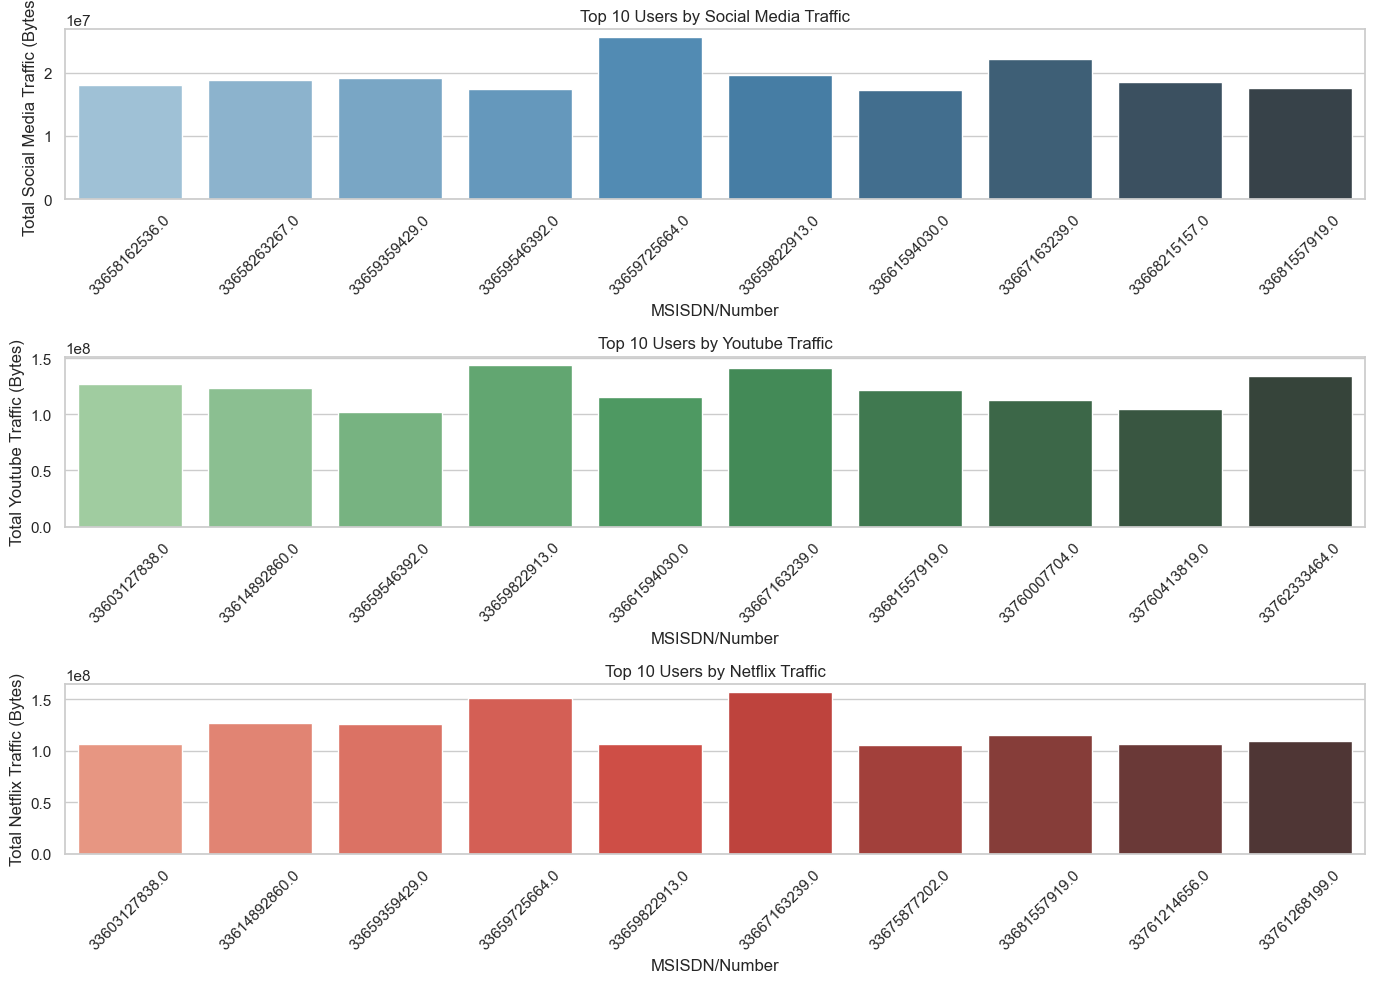

In [69]:
# Plotting the Top 3 Most Used Application

# Set the style for the plot
sns.set(style="whitegrid")

# Plot the Top 10 users for Social Media, Youtube, and Netflix usage
plt.figure(figsize=(14, 10))

# Subplot 1: Top 10 Social Media users
plt.subplot(3, 1, 1)
sns.barplot(x='MSISDN/Number', y='Total Social Media Traffic', data=top_10_social_media, palette='Blues_d')
plt.title('Top 10 Users by Social Media Traffic')
plt.xticks(rotation=45)
plt.ylabel('Total Social Media Traffic (Bytes)')

# Subplot 2: Top 10 Youtube users
plt.subplot(3, 1, 2)
sns.barplot(x='MSISDN/Number', y='Total Youtube Traffic', data=top_10_youtube, palette='Greens_d')
plt.title('Top 10 Users by Youtube Traffic')
plt.xticks(rotation=45)
plt.ylabel('Total Youtube Traffic (Bytes)')

# Subplot 3: Top 10 Netflix users
plt.subplot(3, 1, 3)
sns.barplot(x='MSISDN/Number', y='Total Netflix Traffic', data=top_10_netflix, palette='Reds_d')
plt.title('Top 10 Users by Netflix Traffic')
plt.xticks(rotation=45)
plt.ylabel('Total Netflix Traffic (Bytes)')

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Use K-Means Clustering for User Engagement,

In [50]:
#. Normalize Engagement Metrics
# Select the engagement metrics to be normalized
engagement_metrics = app_traffic[['Total Social Media Traffic', 'Total Youtube Traffic', 
                                  'Total Netflix Traffic', 'Total HTTP Traffic', 'Total Traffic']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the engagement metrics
engagement_metrics_scaled = scaler.fit_transform(engagement_metrics)


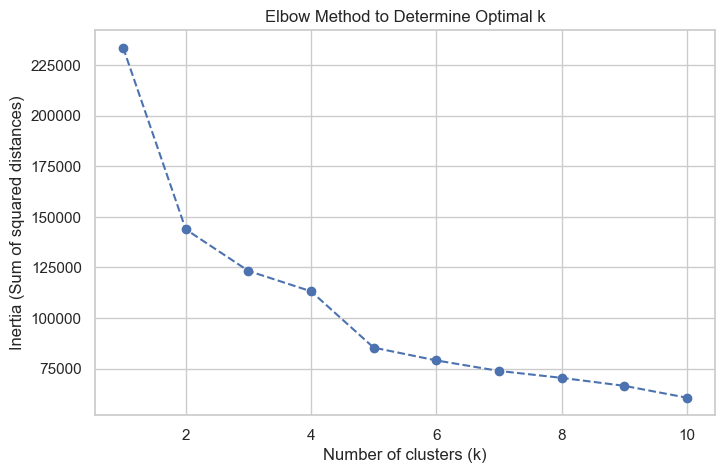

In [51]:
# Find the Optimal k Using the Elbow Method
# Use the Elbow method to find the optimal value of k
inertia = []
k_range = range(1, 11)  # Trying k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(engagement_metrics_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.show()


In [52]:
# Apply K-Means Clustering with Optimal k

# Set k = 3 based on the elbow method (or whatever value you find)
k_optimal = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(engagement_metrics_scaled)

# Add the cluster labels to the original DataFrame
app_traffic['Cluster'] = clusters


In [54]:
#Compute Minimum, Maximum, Average, & Total Metrics for Each Cluster
# Group by clusters and calculate statistics (min, max, average, total)
cluster_stats = app_traffic.groupby('Cluster').agg({
    'Total Social Media Traffic': ['min', 'max', 'mean', 'sum'],
    'Total Youtube Traffic': ['min', 'max', 'mean', 'sum'],
    'Total Netflix Traffic': ['min', 'max', 'mean', 'sum'],
    'Total HTTP Traffic': ['min', 'max', 'mean', 'sum'],
    'Total Traffic': ['min', 'max', 'mean', 'sum']
}).reset_index()

cluster_stats


Cluster Total Social Media Traffic                                          \
                                 min         max          mean           sum   
0       0                   233687.0  25581319.0  8.269483e+06  1.375215e+10   
1       1                    50812.0  11745254.0  4.174733e+06  2.105318e+10   
2       2                     5179.0   6281441.0  1.831173e+06  7.327804e+10   

  Total Youtube Traffic                                           \
                    min          max          mean           sum   
0              517053.0  144048814.0  5.348448e+07  8.894469e+10   
1             1701956.0   65959830.0  2.664630e+07  1.343773e+11   
2                1156.0   43643307.0  1.167799e+07  4.673181e+11   

  Total Netflix Traffic  ...                             Total HTTP Traffic  \
                    min  ...          mean           sum                min   
0              538518.0  ...  5.337470e+07  8.876212e+10             6727.0   
1             1188649.0  ...  2.651263e+07  1.337032e+11               80.0   
2                 262.0  ...  1.170301e+07  4.683194e+11              100.0   

                                            Total Traffic                \
            max          mean           sum           min           max   
0  7.302069e+10  1.942149e+09  3.229794e+12    70209414.0  6.348299e+09   
1  1.738765e+10  3.512146e+08  1.771175e+12   190957251.0  2.779143e+09   
2  2.409727e+10  7.573356e+07  3.030630e+12    38022357.0  1.717894e+09   

                               
           mean           sum  
0  2.239918e+09  3.724984e+12  
1  1.126457e+09  5.680720e+12  
2  4.980124e+08  1.992896e+13  

[3 rows x 21 columns]

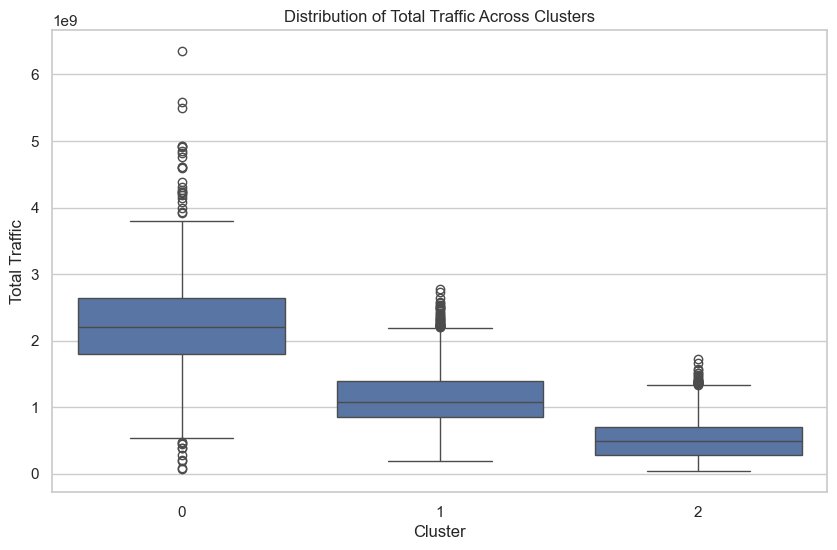

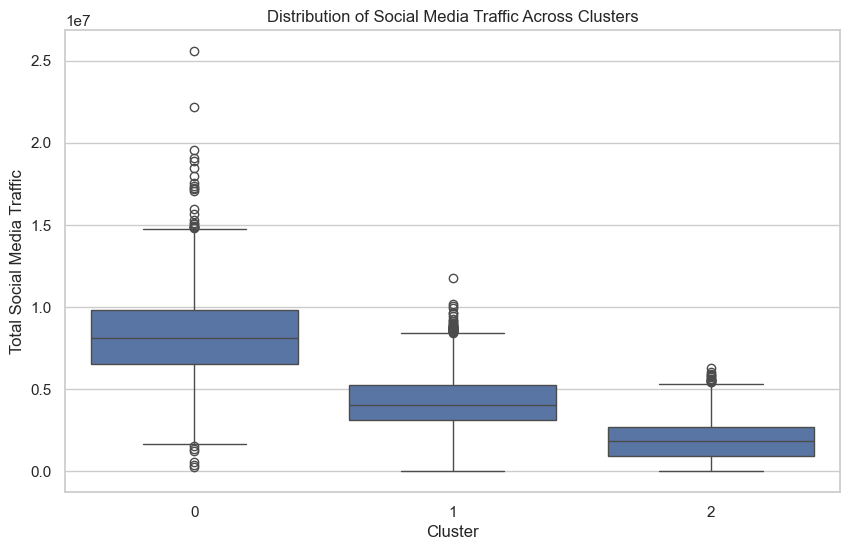

In [55]:
# Visualize the distribution of clusters for Total Traffic
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Total Traffic', data=app_traffic)
plt.title('Distribution of Total Traffic Across Clusters')
plt.show()

# Similarly, you can visualize other metrics (e.g., Total Social Media Traffic)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Total Social Media Traffic', data=app_traffic)
plt.title('Distribution of Social Media Traffic Across Clusters')
plt.show()
